# GRIP - THE SPARKS FOUNDATION
## Exploratory Data Analysis - Sports (IPL)
### Task-5
#### As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
#### ● Suggest teams or players a company should endorse for its products.

# Import required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

# Load the data

In [2]:
match=pd.read_csv('E:\Akansha\Datasets\GRIP task datasets/matches.csv')
bowler=pd.read_csv('E:\Akansha\Datasets\GRIP task datasets/deliveries.csv')
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
bowler.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


# Data Pre-processing

In [79]:
match.shape

(756, 18)

In [10]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

#### Date is in object datatype, we will change it into datetime datatype.

In [3]:
match['date']=pd.to_datetime(match['date'])

In [4]:
match.dtypes

id                          int64
season                      int64
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                  int64
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
umpire1                    object
umpire2                    object
umpire3                    object
dtype: object

In [38]:
match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [35]:
match.duplicated().sum()

0

In [7]:
bowler.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

#### We can see huge number of null values.

# Analysing most successful team

In [39]:
match['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

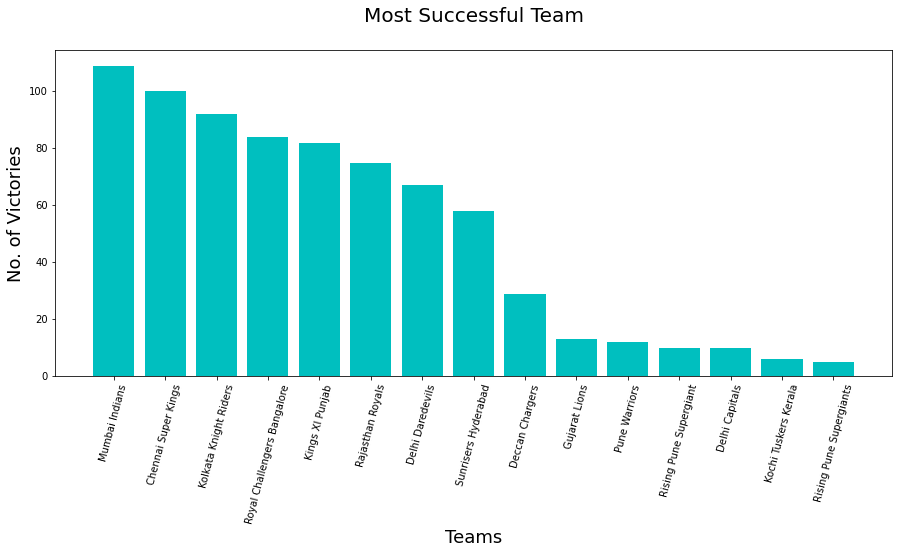

In [71]:
plt.figure(figsize=(15,6))
plt.xlabel('Teams',fontsize=18)
plt.ylabel('No. of Victories',fontsize=18)
plt.title('Most Successful Team\n', fontsize=20)
plt.xticks(rotation=75)
plt.bar(list(match['winner'].value_counts().keys()), list(match['winner'].value_counts()),color='c')
plt.show()

#### Mumbai Indians is the most successful team in the IPL

# Analysing Most Successful Team Batting First and Second

In [7]:
# Batting first

bat_first_winner=match[match['win_by_runs']!=0]
bat_first_winner.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN


In [8]:
plot1=bat_first_winner['winner'].value_counts().reset_index()
plot1.columns=['TEAMS','WINS']
plot1

,TEAMS,WINS
0,Mumbai Indians,57
1,Chennai Super Kings,52
2,Kings XI Punjab,38
3,Kolkata Knight Riders,36
4,Royal Challengers Bangalore,35
5,Sunrisers Hyderabad,30
6,Rajasthan Royals,27
7,Delhi Daredevils,25
8,Deccan Chargers,18
9,Pune Warriors,6


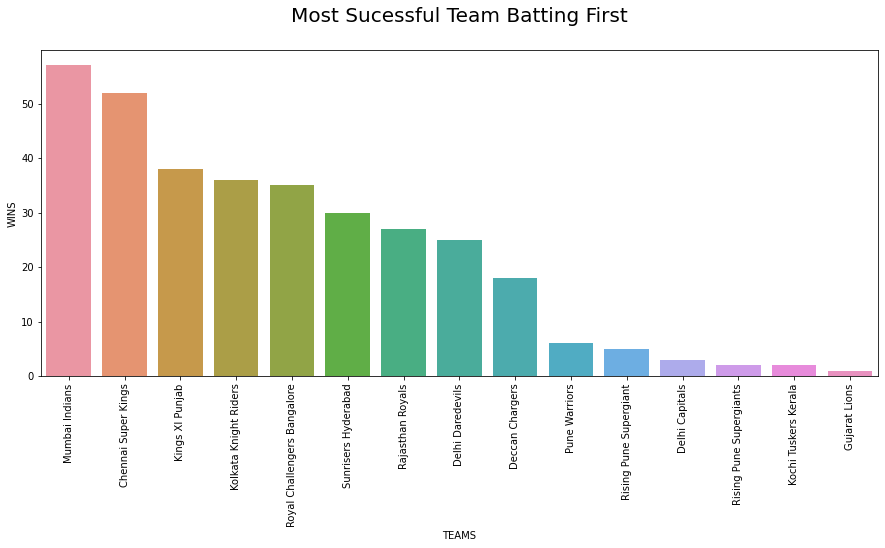

In [66]:
plt.figure(figsize=(15,6))
plt.title('Most Sucessful Team Batting First\n',fontsize=20)
plt.xticks(rotation=90)
sns.barplot(x='TEAMS',y='WINS',data=plot1)
plt.show()

#### Again Mumbai Indians is the team which won the maximum matches batting first.

## Analysing Batting First Team Winning Runs

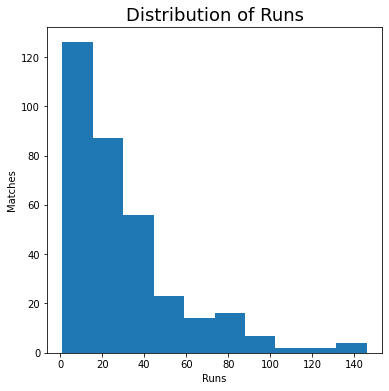

In [19]:
plt.figure(figsize=(6,6))
plt.title('Distribution of Runs',fontsize=18)
plt.xlabel('Runs')
plt.ylabel('Matches')
plt.hist(bat_first_winner['win_by_runs'])
plt.show()

#### We can observe that there are more than 120 matches where batting first team has won the match by very small margin of runs like 1-20 runs.

In [10]:
# batting second

bat_second_winner=match[match['win_by_wickets']!=0]
bat_second_winner.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN


In [11]:
plot2=bat_second_winner['winner'].value_counts().reset_index()
plot2.columns=['TEAMS','WINS']
plot2

,TEAMS,WINS
0,Kolkata Knight Riders,56
1,Mumbai Indians,50
2,Royal Challengers Bangalore,48
3,Chennai Super Kings,48
4,Rajasthan Royals,46
5,Delhi Daredevils,42
6,Kings XI Punjab,42
7,Sunrisers Hyderabad,27
8,Gujarat Lions,12
9,Deccan Chargers,11


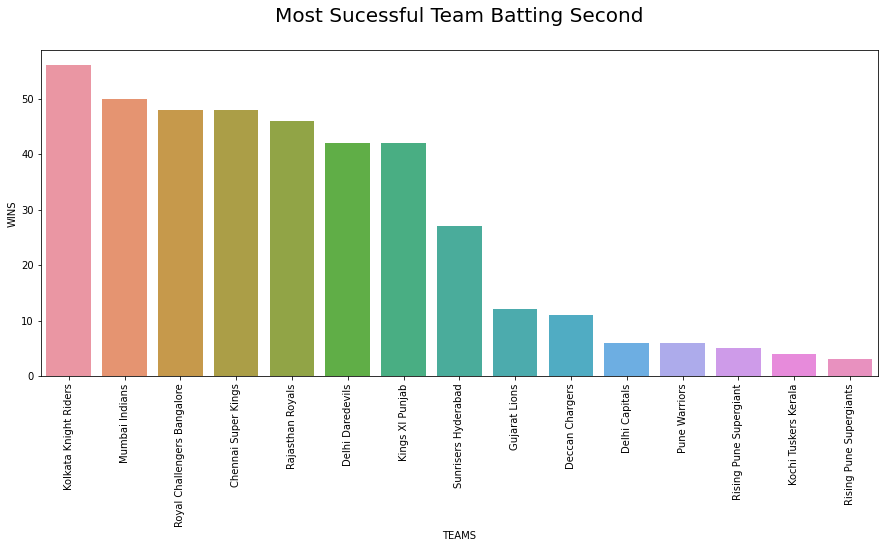

In [67]:
plt.figure(figsize=(15,6))
plt.title('Most Sucessful Team Batting Second\n',fontsize=20)
plt.xticks(rotation=90)
sns.barplot(x='TEAMS',y='WINS',data=plot2)
plt.show()

#### Kolkata Knight Riders is the most successful team batting second.

## Analysing Batting Second Team Wins By Wickets

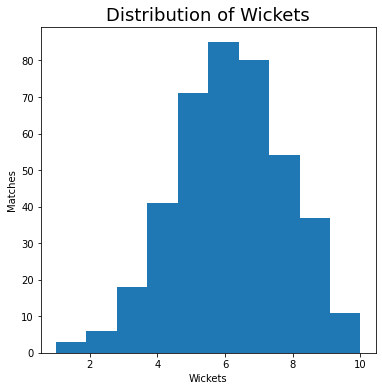

In [21]:
plt.figure(figsize=(6,6))
plt.title('Distribution of Wickets',fontsize=18)
plt.xlabel('Wickets')
plt.ylabel('Matches')
plt.hist(bat_second_winner['win_by_wickets'])
plt.show()

#### Most of the team batting second won the match by 5-7 wickets.

# Toss Analysis

In [4]:
toss=match['toss_decision'].value_counts().reset_index()
toss.columns=['toss_decision','counts']
toss

,toss_decision,counts
0,field,463
1,bat,293


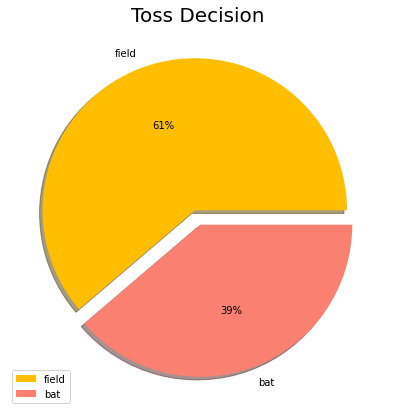

In [10]:
plt.figure(figsize=(12,7))
plt.title('Toss Decision',fontsize=20)
myexplode=[0.05,0.05]
plt.pie(x='counts',labels='toss_decision',data=toss,explode=myexplode,shadow=True,autopct='%1.0f%%',colors=['#FFBF00','#FA8072'])
plt.legend()
plt.show()

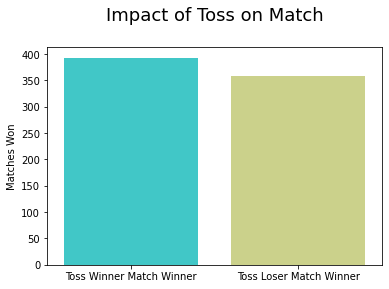

In [75]:
count=[match[match.toss_winner==match.winner].winner.count(),match[match.toss_winner!=match.winner].winner.count()]
x=['Toss Winner Match Winner','Toss Loser Match Winner']
plt.title('Impact of Toss on Match\n',fontsize=18)
plt.ylabel('Matches Won')
sns.barplot(x=x,y=count,palette='rainbow')
plt.show()

#### Winning the toss doesn't impacts much in the winning of the match. As the distribution is almost 50-50.

<AxesSubplot:title={'center':'Toss Decision Team Wise\n'}, xlabel='toss_winner', ylabel='count'>

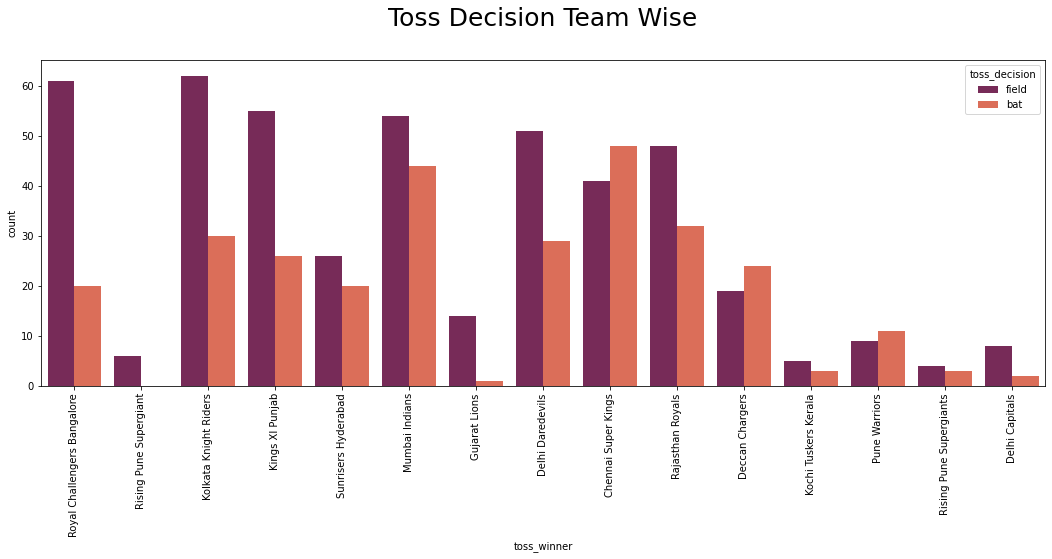

In [49]:
plt.figure(figsize=(18,6))
plt.title('Toss Decision Team Wise\n',fontsize=25)
plt.xticks(rotation=90)
sns.countplot('toss_winner',hue='toss_decision',data=match,palette='rocket')
plt.show()

#### Chennai Super Kings is the only team who has opted to bat first more than field first.
#### Rest of the teams generally opt to field first than bat first.

# Analysing top match hosting cities of IPL

In [75]:
city=match['city'].value_counts().reset_index()
city.columns=['cities','matches_played']
city

,cities,matches_played
0,Mumbai,101
1,Kolkata,77
2,Delhi,74
3,Bangalore,66
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


<AxesSubplot:title={'center':'Top Match Hosting Cities of IPL\n'}, xlabel='cities', ylabel='matches_played'>

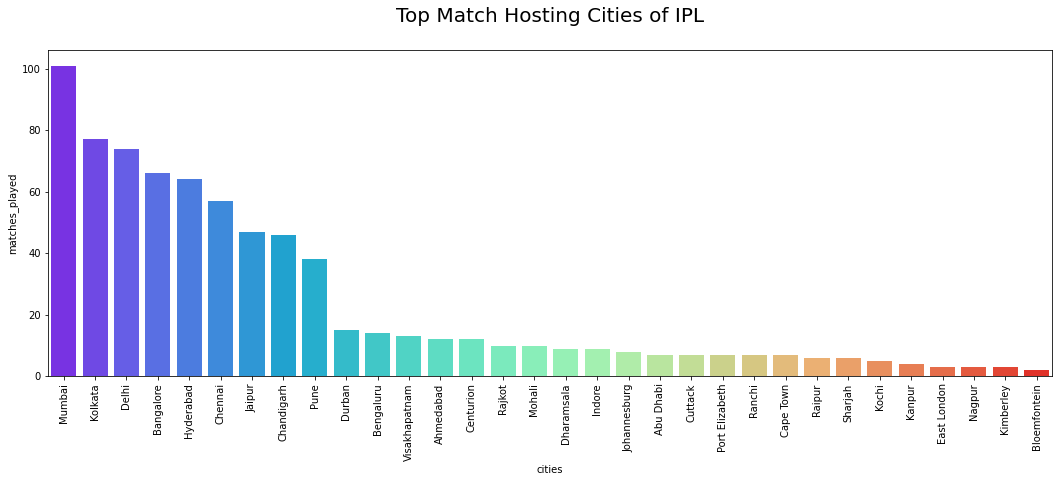

In [79]:
plt.figure(figsize=(18,6))
plt.title('Top Match Hosting Cities of IPL\n',fontsize=20)
plt.xticks(rotation=90)
sns.barplot(x='cities',y='matches_played',data=city,palette='rainbow')

#### Most of the matches has been played in Mumbai

# Analysing top venues of IPL

In [12]:
venue=match['venue'].value_counts().reset_index()
venue.columns=['Venue','Matches_played']
venue

,Venue,Matches_played
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


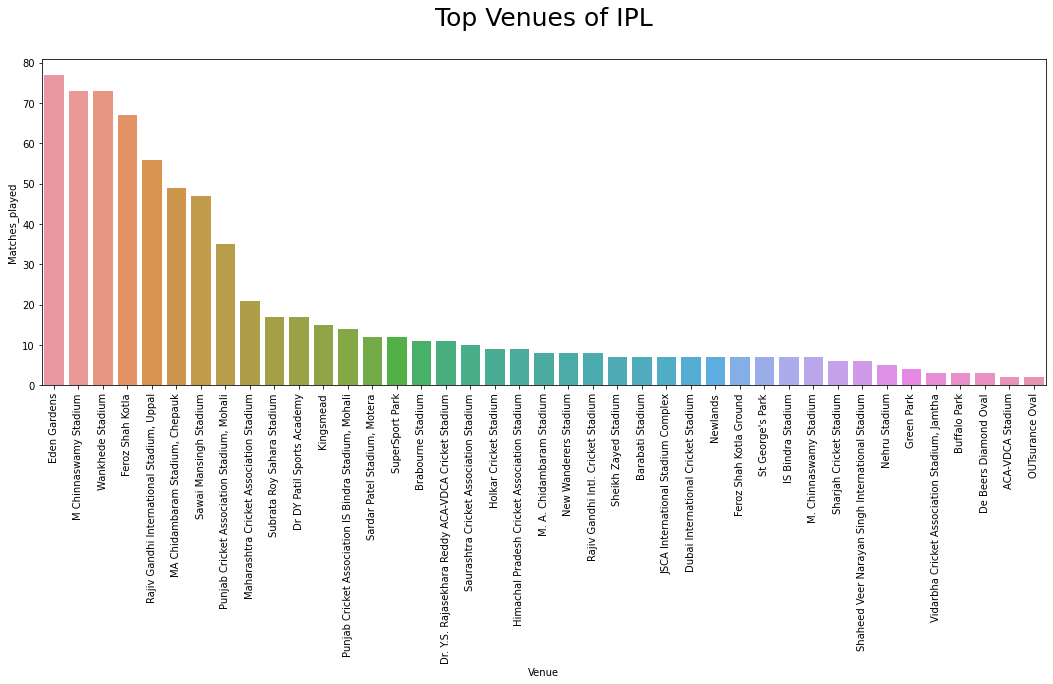

In [14]:
plt.figure(figsize=(18,6))
plt.title('Top Venues of IPL\n',fontsize=25)
plt.xticks(rotation=90)
sns.barplot(x='Venue',y='Matches_played',data=venue)
plt.show()

# Analysing total matches played Season-wise

In [19]:
match['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2015    59
2017    59
2008    58
2009    57
Name: season, dtype: int64

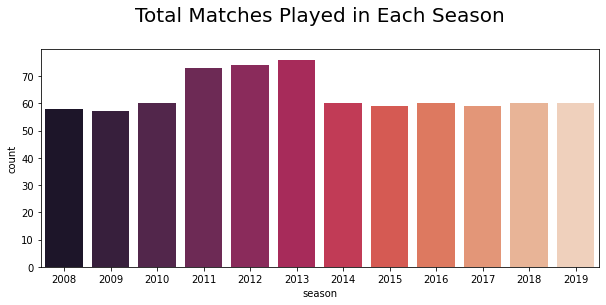

In [51]:
plt.figure(figsize=(10,4))
plt.title('Total Matches Played in Each Season\n',fontsize=20)
sns.countplot('season',data=match,palette='rocket')
plt.show()

#### In 2013, maximum matches has been played in IPL.

# Analysing most successful players

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
MEK Hussey        12
AM Rahane         12
V Sehwag          11
DR Smith          11
A Mishra          11
AD Russell        11
KA Pollard        10
JH Kallis         10
AT Rayudu          9
SP Narine          9
Name: player_of_match, dtype: int64


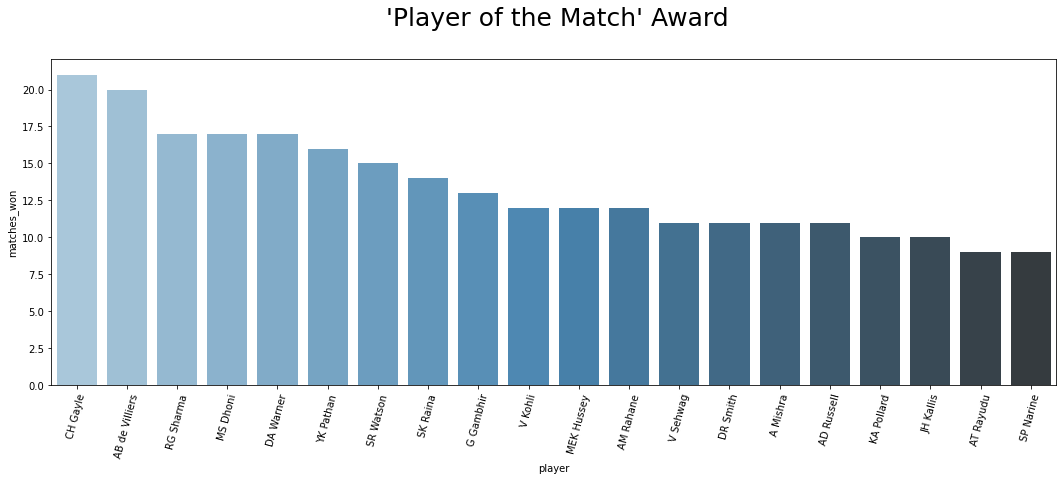

In [3]:
print(match['player_of_match'].value_counts()[0:20])
player=match['player_of_match'].value_counts()[0:20].reset_index()
player.columns=['player','matches_won']

plt.figure(figsize=(18,6))
plt.title(" 'Player of the Match' Award\n",fontsize=25)
plt.xticks(rotation=75)
sns.barplot(x='player',y='matches_won',data=player,palette='Blues_d')
plt.show()

#### Chris Gayle holds the maximum 'Player of the Match' title. Hence, he is the most popular player during auctions. 
#### Other players like AB de Villiers, DA Warner, MS Dhoni and RG Sharma are the players who have received the highest number of man of the match awards!
#### Among top 15 players , there are 8 Indian players who won maximum 'Player of the Match' title.

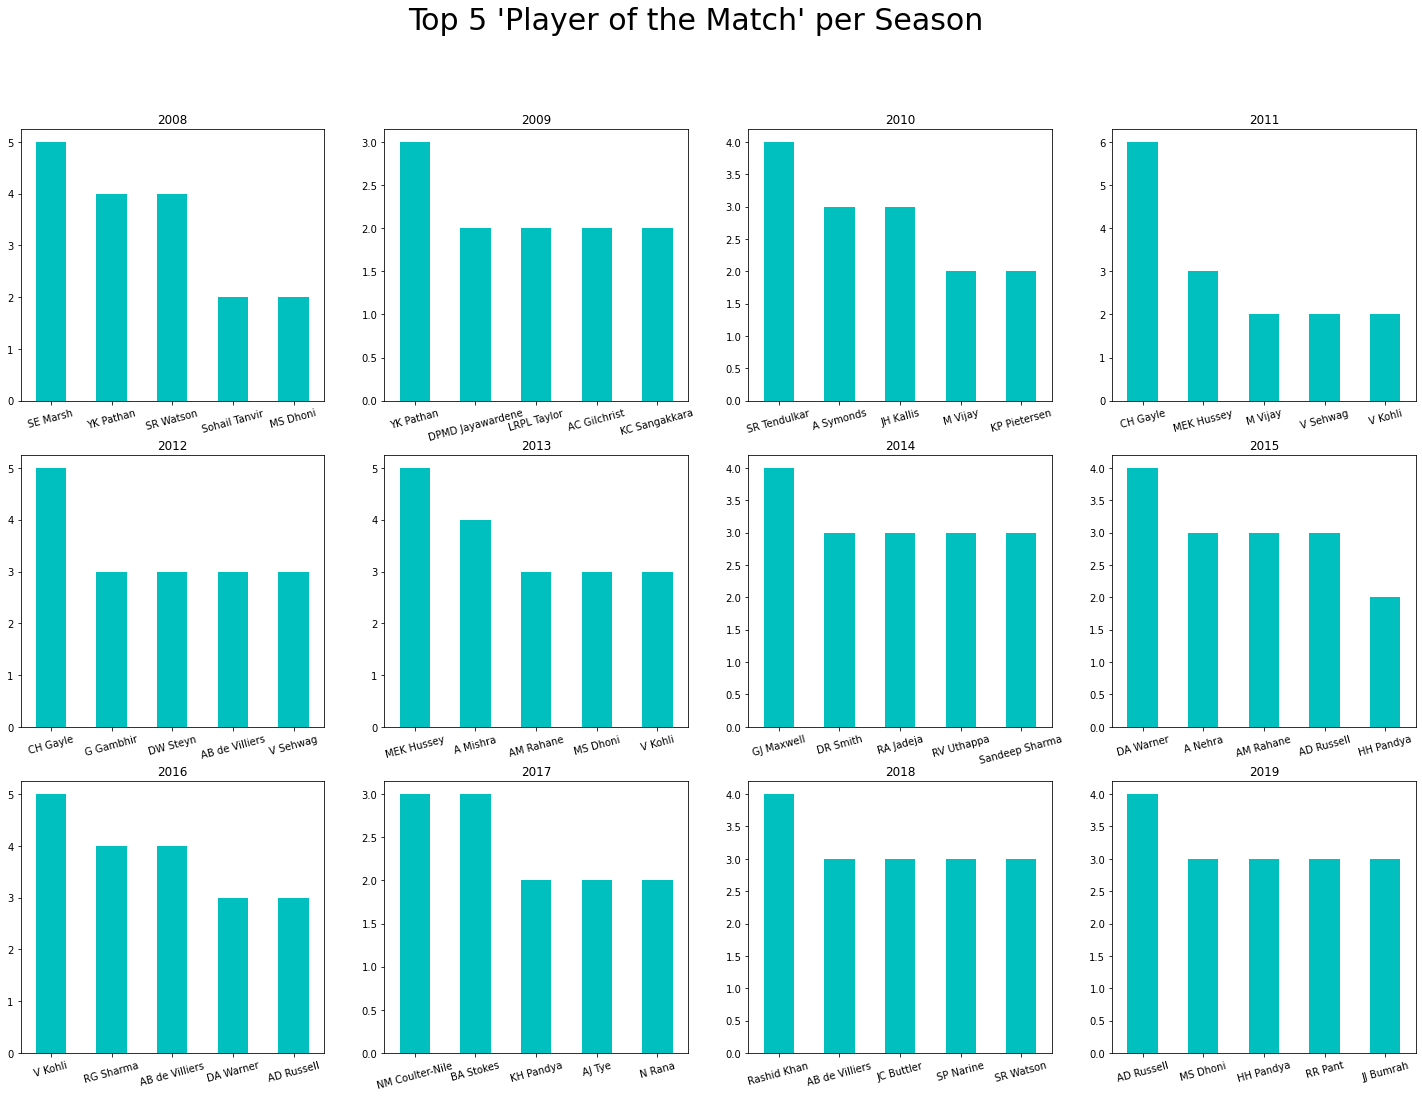

In [77]:
# Top 5 'Player of the match' each season

plt.figure(figsize=[25,17])
plt.suptitle("Top 5 'Player of the Match' per Season", fontsize=30)
season1 = 2008
for i in range(1,13):
        plt.subplot(3,4,i)
        plt.title(season1)
        match[match.season == season1].player_of_match.value_counts()[0:5].plot(kind='bar',color='c')
        plt.xticks(rotation=15)
        season1 += 1
plt.show()

#### We can easily see the top players from each season from the above charts. Such analysis helps the team selectors to choose the players during the auction.

# Analysing Most Run Scoring Batsman

In [52]:
batsman_runs=bowl.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)[0:20].reset_index()
batsman_runs.columns=['Batsman','Runs']
batsman_runs

,Batsman,Runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


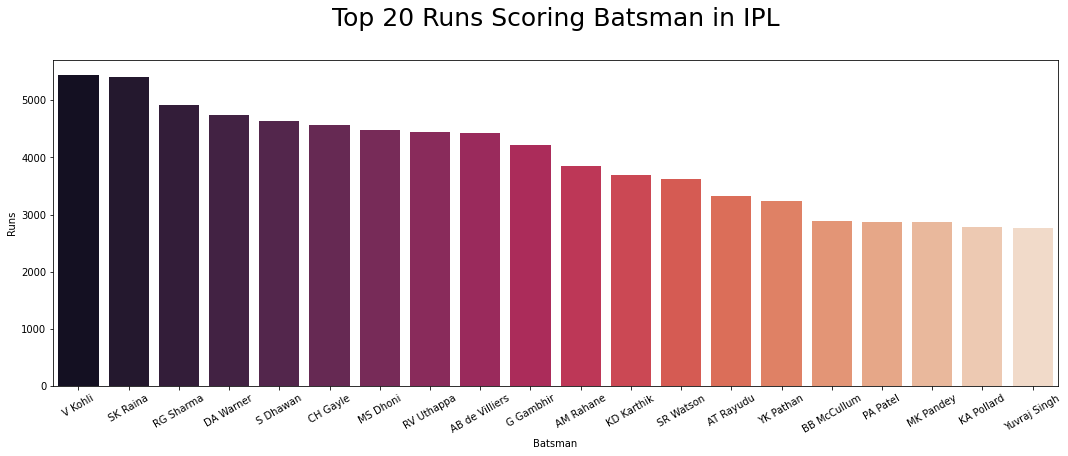

In [59]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=30)
plt.title('Top 20 Runs Scoring Batsman in IPL\n',fontsize=25)
sns.barplot(x='Batsman',y='Runs',data=batsman_runs,palette='rocket')
plt.show()

#### Virat Kohli has the maximum number of runs in IPL i.e. 5434 runs. Hence, he has a big contribution in winnings of RCB. Whereas, Suresh Raina holds the second position in the race.
#### There are 14 Indian Players in top 20 of most run scoring batsman in IPL.

# Analysing Most 4 and 6 Hitting Batsman

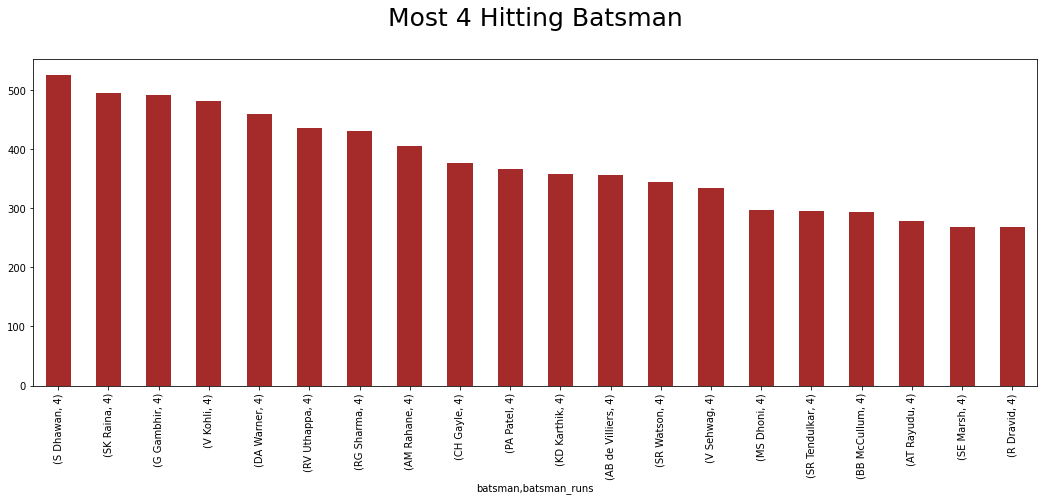

In [11]:
plt.figure(figsize=(18,6))
plt.title('Most 4 Hitting Batsman\n',fontsize=25)
fours=bowler[bowler.batsman_runs==4].groupby('batsman')
fours['batsman_runs'].value_counts().sort_values(ascending=False)[0:20].plot(kind='bar',color='brown')
plt.show()

#### Shikhar Dhawan is the most 4 hitting batsman in IPL. 

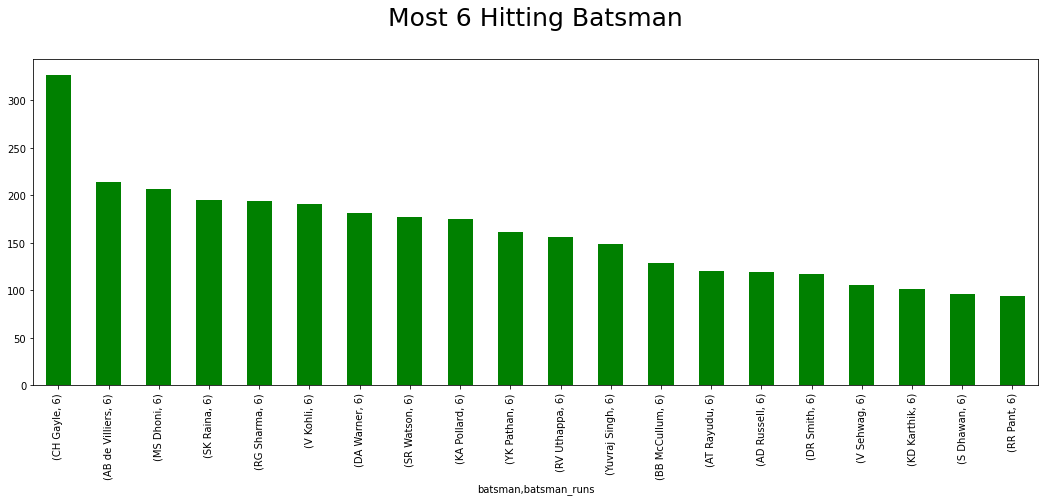

In [12]:
plt.figure(figsize=(18,6))
plt.title('Most 6 Hitting Batsman\n',fontsize=25)
fours=bowler[bowler.batsman_runs==6].groupby('batsman')
fours['batsman_runs'].value_counts().sort_values(ascending=False)[0:20].plot(kind='bar',color='green')
plt.show()


#### Chris Gayle is the most 6 hitting batsman in IPL. None of the player is not at all near to his 6 hitting records.

# Analysing Dismissal Kind of Player

In [17]:
dismissal_kind=bowler['dismissal_kind'].value_counts().reset_index()[1:10]
dismissal_kind.columns=['Dismissal Kind','Counts']
dismissal_kind

,Dismissal Kind,Counts
1,caught,5348
2,bowled,1581
3,run out,852
4,lbw,540
5,stumped,278
6,caught and bowled,211
7,retired hurt,12
8,hit wicket,10
9,obstructing the field,2


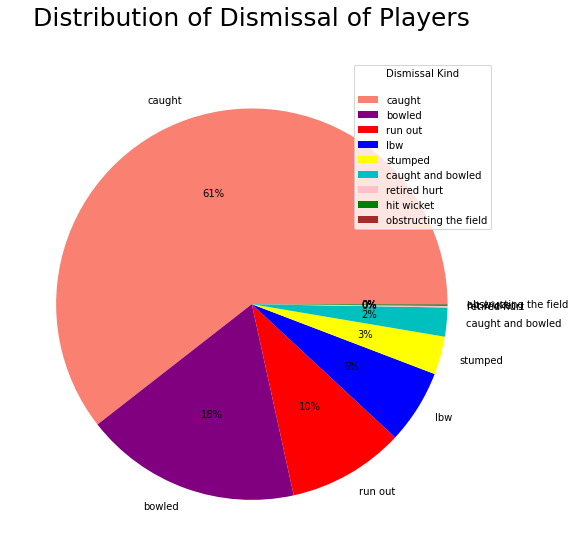

In [18]:
plt.figure(figsize=(13,9))
colors=['#FA8072','purple','red','blue','yellow','c','pink','green','brown']
plt.pie(labels='Dismissal Kind',x='Counts',data=dismissal_kind,autopct='%1.0f%%',colors=colors)
plt.title('Distribution of Dismissal of Players\n',fontsize=25)
plt.legend(title='Dismissal Kind\n')
plt.show()

#### More than 60% of the time players dismissals by catch out.

# Bowler Analysis

In [6]:
wickets=bowler.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False)[0:20].reset_index()
wickets.columns=['Bowler','Wickets']
wickets

,Bowler,Wickets
0,SL Malinga,188
1,DJ Bravo,168
2,A Mishra,165
3,Harbhajan Singh,161
4,PP Chawla,156
5,B Kumar,141
6,R Ashwin,138
7,SP Narine,137
8,UT Yadav,136
9,R Vinay Kumar,127


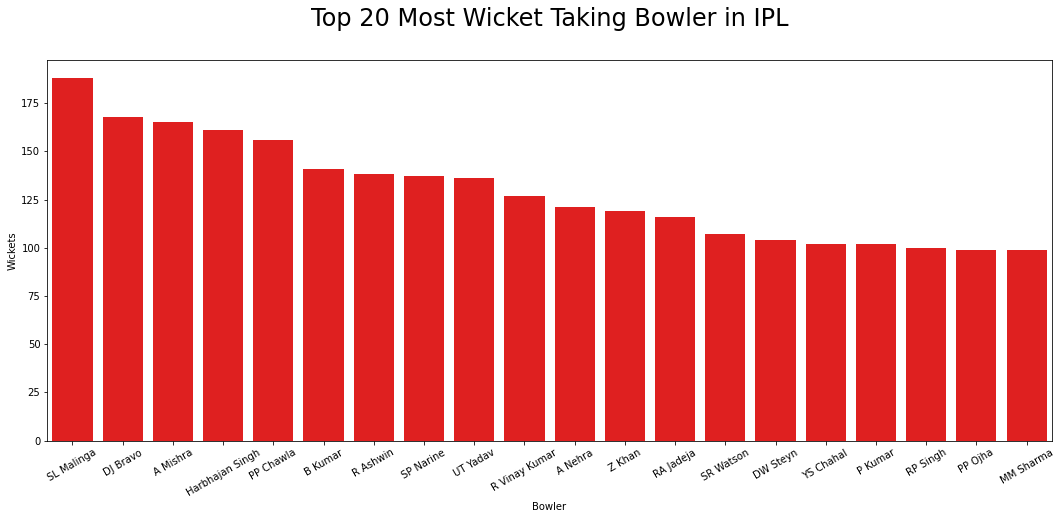

In [7]:
plt.figure(figsize=(18,7))
plt.title('Top 20 Most Wicket Taking Bowler in IPL\n',fontsize=24)
plt.xticks(rotation=30)
sns.barplot(x='Bowler',y='Wickets',data=wickets,color='r')
plt.show()

#### Lasith Malinga is the most wicket-taking bowler of all time. Hence, he has a big contribution in winnings of Mumbai Indians. Whereas, DJ Bravo holds the second position.
#### There are 15 Indian Players in top 20 wicket taking bowlers in IPL.

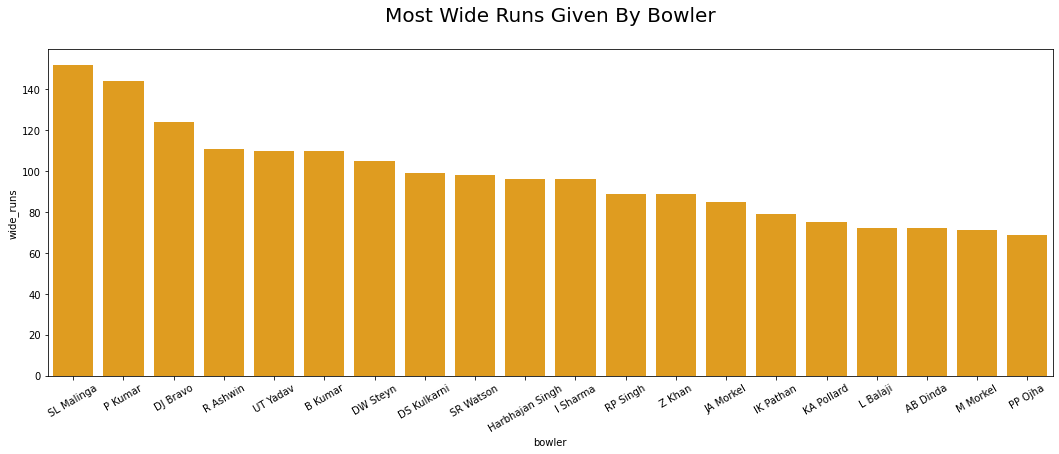

In [8]:
wide_run=bowler.groupby('bowler')['wide_runs'].sum().sort_values(ascending=False).reset_index()[0:20]
plt.figure(figsize=(18,6))
plt.title('Most Wide Runs Given By Bowler\n',fontsize=20)
plt.xticks(rotation=30)
sns.barplot(x='bowler',y='wide_runs',data=wide_run,color='orange')
plt.show()

#### Again, Lasith Malinga has given the most wide runs in IPL.

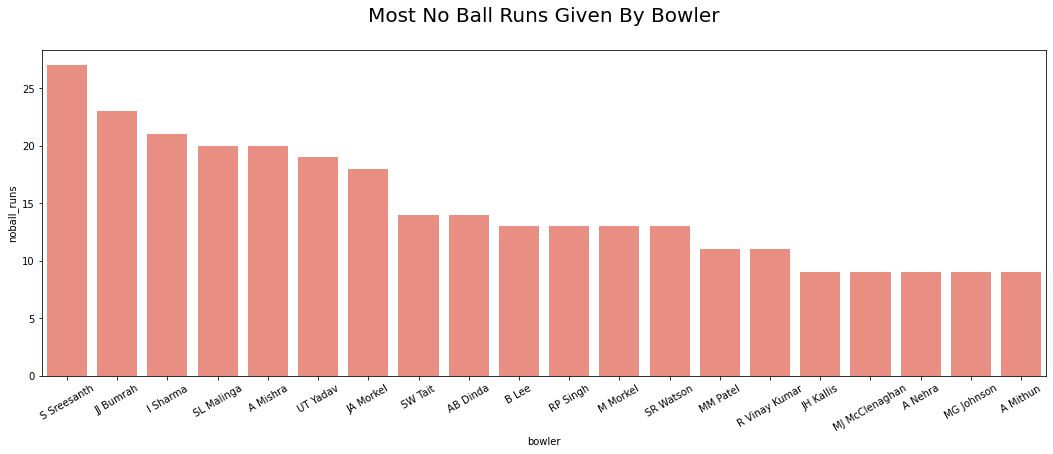

In [9]:
noball_run=bowler.groupby('bowler')['noball_runs'].sum().sort_values(ascending=False).reset_index()[0:20]
plt.figure(figsize=(18,6))
plt.title('Most No Ball Runs Given By Bowler\n',fontsize=20)
plt.xticks(rotation=30)
sns.barplot(x='bowler',y='noball_runs',data=noball_run,color='#FA8072')
plt.show()

#### Most No Ball runs given in IPL by S Shreesanth.

# Analysing Home Ground Benefit For Teams

In [63]:
match['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [58]:
match['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [52]:
MI = match[(match['winner']=='Mumbai Indians') & (match['city']=='Mumbai')]
MI['winner'].value_counts()

Mumbai Indians    53
Name: winner, dtype: int64

In [53]:
CSK = match[(match['winner']=='Chennai Super Kings') & (match['city']=='Chennai')]
CSK['winner'].value_counts()

Chennai Super Kings    40
Name: winner, dtype: int64

In [57]:
RCB = match[(match['winner']=='Royal Challengers Bangalore') & (match['city']=='Bangalore')]
RCB['winner'].value_counts()

Royal Challengers Bangalore    30
Name: winner, dtype: int64

In [60]:
SRH = match[(match['winner']=='Sunrisers Hyderabad') & (match['city']=='Hyderabad')]
SRH['winner'].value_counts()

Sunrisers Hyderabad    30
Name: winner, dtype: int64

In [61]:
KKR = match[(match['winner']=='Kolkata Knight Riders') & (match['city']=='Kolkata')]
KKR['winner'].value_counts()

Kolkata Knight Riders    45
Name: winner, dtype: int64

In [64]:
KXIP = match[(match['winner']=='Kings XI Punjab') & (match['city']=='Chandigarh')]
KXIP['winner'].value_counts()

Kings XI Punjab    22
Name: winner, dtype: int64

In [65]:
RR = match[(match['winner']=='Rajasthan Royals') & (match['city']=='Jaipur')]
RR['winner'].value_counts()

Rajasthan Royals    32
Name: winner, dtype: int64

In [70]:
DC = match[(match['winner'].isin(['Delhi Capitals','Delhi Daredevils'])) & (match['city']=='Delhi')]
DC['winner'].value_counts()

Delhi Daredevils    27
Delhi Capitals       4
Name: winner, dtype: int64

#### Mumbai Indians has won the most matches in their home ground as compare to other teams.

# Conclusion

The highest number of match played in IPL season was 2013,2014,2015.

The highest number of match won by Mumbai Indians i.e 4 match out of 12 matches.

Teams which Bowl first has higher chances of winning then the team which bat first. But this doesn't effect much.

After winning toss most of the teams decide to do fielding first.

Top player of match titles won by CH gayle, AB de villers.

The highest number of four hit by player is Shikar Dhawan.

The highest number of six hit by player is CH gayle.

Top leading run scorer in IPL are Virat kholi, SK Raina, RG Sharma.

The highest number of matches played by player name are SK Raina, RG Sharma.

Dismissals in IPL was most by Catch out .

The IPL most wicket taken bowler is SL Malinga. Also, he has delivered the most wide runs.

Most No Ball runs given in IPL by S Shreesanth.

Mumbai Indians has won the most matches in their home ground as compare to other teams i.e. 53 matches. 

## Thank You